web scraping.py: Initial csv creation for stat data(pts, gp, mp, awards).

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

# --- 1) Analiz edilecek oyuncular ve Basketball-Reference slug'ları ---
players = {
    "Luka Doncic":         "d/doncilu01",
    "Stephen Curry":       "c/curryst01",
    "LeBron James":        "j/jamesle01",
    "Jayson Tatum":        "t/tatumja01",
    "Jalen Brunson":       "b/brunsja01",
    "Victor Wembanyama":   "w/wembavi01",
    "Anthony Edwards":     "e/edwaran01",
    "Ja Morant":           "m/moranja01",
    "Giannis Antetokounmpo":"a/antetgi01",
    "Devin Booker":        "b/bookede01",
    "Kevin Durant":        "d/duranke01",
    "James Harden":        "h/hardeja01",
    "Joel Embiid":         "e/embiijo01",
    "Kyrie Irving":        "i/irvinky01",
}

base_url = "https://www.basketball-reference.com/players/"

all_data = []

for name, slug in players.items():
    url = f"{base_url}{slug}.html"
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")
    tbl = soup.find("table", id="per_game_stats")
    tbody = tbl.find("tbody")

    # 1) Tüm satırları (yıl, tr) olarak topla
    seasons = []
    for row in tbody.find_all("tr"):
        th = row.find("th", {"data-stat": "year_id"})
        if not th or not th.has_attr("csk"):
            continue
        year = int(th["csk"])
        seasons.append((year, row))

    # 2) En güncel 5 sezonu seç
    seasons = sorted(seasons, key=lambda yr_row: yr_row[0], reverse=True)[:5]

    # 3) Her sezonu işle
    for year, row in seasons:
        cols = row.find_all("td")
        gp  = cols[4].text.strip()      # games
        mpg = cols[6].text.strip()      # mp_per_g
        pts = cols[-2].text.strip()     # pts_per_g
        aw  = cols[-1].text.strip() or "No Awards"

        season_label = f"{year-1}-{str(year)[-2:]}"
        all_data.append({
            "Player": name,
            "Season": season_label,
            "Games Played": gp,
            "Minutes/Game": mpg,
            "Points/Game": pts,
            "Awards": aw
        })

    # siteye fazla yüklenmemek için kısa uyku
    sleep(1.0)

# 4) DataFrame oluştur ve CSV’ye kaydet
df = pd.DataFrame(all_data)
df = df.sort_values(["Player","Season"], ascending=[True,True])
df.to_csv("nba_top8_last5_by_player.csv", index=False)
print(df)


               Player   Season Games Played Minutes/Game Points/Game  \
31    Anthony Edwards  2020-21           72         32.1        19.3   
30    Anthony Edwards  2021-22           72         34.3        21.3   
29    Anthony Edwards  2022-23           79         36.0        24.6   
28    Anthony Edwards  2023-24           79         35.1        25.9   
27    Anthony Edwards  2024-25           79         36.3        27.6   
..                ...      ...          ...          ...         ...   
7       Stephen Curry  2022-23           56         34.7        29.4   
6       Stephen Curry  2023-24           74         32.7        26.4   
5       Stephen Curry  2024-25           70         32.2        24.5   
26  Victor Wembanyama  2023-24           71         29.7        21.4   
25  Victor Wembanyama  2024-25           46         33.2        24.3   

                  Awards  
31                 ROY-2  
30             No Awards  
29                    AS  
28  MVP-7,CPOY-8,AS,NBA2  


jersey_ranking.py: Code creates jersey_rank.csv for 5 year.

In [3]:
import pandas as pd

# 1) Sezon bazlı sıralamalarını bir dict içinde tanımlıyoruz
jersey_data = {
    '2024-2025': [
        'Luka Doncic',
        'Stephen Curry',
        'LeBron James',
        'Jayson Tatum',
        'Jalen Brunson',
        'Victor Wembanyama',
        'Anthony Edwards',
        'Ja Morant'
    ],
    '2023-2024': [
        'Stephen Curry',
        'Jayson Tatum',
        'LeBron James',
        'Victor Wembanyama',
        'Giannis Antetokounmpo',
        'Luka Doncic',
        'Devin Booker',
        'Kevin Durant'
    ],
    '2022-2023': [
        'LeBron James',
        'Stephen Curry',
        'Jayson Tatum',
        'Giannis Antetokounmpo',
        'Luka Doncic',
        'Kevin Durant',
        'Devin Booker',
        'Ja Morant'
    ],
    '2021-2022': [
        'LeBron James',
        'James Harden',
        'Stephen Curry',
        'Kevin Durant',
        'Jayson Tatum',
        'Joel Embiid',
        'Giannis Antetokounmpo',
        'Luka Doncic'
    ],
    '2020-2021': [
        'LeBron James',
        'Giannis Antetokounmpo',
        'Kevin Durant',
        'Luka Doncic',
        'Jayson Tatum',
        'Devin Booker',
        'Stephen Curry',
        'Kyrie Irving'
    ]
}

# 2) satır satır açıp 'Season', 'Rank', 'Player' sütunları olarak listeye ekliyoruz
rows = []
for season, players in jersey_data.items():
    for rank, player in enumerate(players, start=1):
        rows.append({
            'Season': season,
            'Rank': rank,
            'Player': player
        })

# 3) DataFrame'e dönüştür ve CSV'ye yaz
df = pd.DataFrame(rows)
df.to_csv('jersey_ranks.csv', index=False)

print("Oluşan CSV'nin ilk 10 satırı:")
print(df)


Oluşan CSV'nin ilk 10 satırı:
       Season  Rank                 Player
0   2024-2025     1            Luka Doncic
1   2024-2025     2          Stephen Curry
2   2024-2025     3           LeBron James
3   2024-2025     4           Jayson Tatum
4   2024-2025     5          Jalen Brunson
5   2024-2025     6      Victor Wembanyama
6   2024-2025     7        Anthony Edwards
7   2024-2025     8              Ja Morant
8   2023-2024     1          Stephen Curry
9   2023-2024     2           Jayson Tatum
10  2023-2024     3           LeBron James
11  2023-2024     4      Victor Wembanyama
12  2023-2024     5  Giannis Antetokounmpo
13  2023-2024     6            Luka Doncic
14  2023-2024     7           Devin Booker
15  2023-2024     8           Kevin Durant
16  2022-2023     1           LeBron James
17  2022-2023     2          Stephen Curry
18  2022-2023     3           Jayson Tatum
19  2022-2023     4  Giannis Antetokounmpo
20  2022-2023     5            Luka Doncic
21  2022-2023     6     

new_ordered_comparison.py: Utilizes the nba_top8_last5_by_player.csv file generated by web_scraping.py. It processes the "Awards" column by converting descriptive award strings into a numerical count of total awards received by each player for the corresponding season.

In [4]:
import pandas as pd

# 1) Load your raw per‐player file (with the original “Awards” column)
df = pd.read_csv('nba_top8_last5_by_player.csv')

# 2) Convert stat columns to numeric so we can sum/mean them
df['Games Played'] = pd.to_numeric(df['Games Played'],   errors='coerce')
df['Minutes/Game'] = pd.to_numeric(df['Minutes/Game'],    errors='coerce')
df['Points/Game']  = pd.to_numeric(df['Points/Game'],     errors='coerce')

# 3) Normalize the Awards column and build Award Count
df['Awards'] = df['Awards'].fillna('')  # replace NaN with empty string
# Treat any literal "No Awards" as empty
df.loc[df['Awards'].str.strip().str.lower() == 'no awards', 'Awards'] = ''

df['Award Count'] = (
    df['Awards']
      .str.split(',')
      .apply(lambda lst: sum(1 for award in lst if award.strip()))
)

# 4) Group by Season & Player, aggregating as requested
cleaned = (
    df
    .groupby(['Season','Player'], as_index=False)
    .agg({
        'Games Played': 'sum',    # sum games across multiple stints
        'Minutes/Game': 'mean',   # average minutes per game
        'Points/Game':  'mean',   # average points per game
        'Award Count':  'sum'     # total awards that season
    })
)

# 5) (Optional) sort for readability
cleaned = cleaned.sort_values(['Season','Games Played'], ascending=[True,False])

# 6) Write out the cleaned CSV
cleaned.to_csv('nba_top8_last5_cleaned_with_awards.csv', index=False)

# 7) Print a preview
print(cleaned)


     Season                 Player  Games Played  Minutes/Game  Points/Game  \
0   2020-21        Anthony Edwards            72     32.100000    19.300000   
4   2020-21          Jalen Brunson            68     25.000000    12.600000   
1   2020-21           Devin Booker            67     33.900000    25.600000   
5   2020-21           Jayson Tatum            64     35.800000    26.400000   
3   2020-21              Ja Morant            63     32.600000    19.100000   
8   2020-21          Stephen Curry            63     34.200000    32.000000   
2   2020-21  Giannis Antetokounmpo            61     33.000000    28.100000   
6   2020-21            Joel Embiid            51     31.100000    28.500000   
7   2020-21           LeBron James            45     33.400000    25.000000   
14  2021-22           James Harden           109     37.100000    22.250000   
13  2021-22          Jalen Brunson            79     31.900000    16.300000   
15  2021-22           Jayson Tatum            76    

pts_graph.py

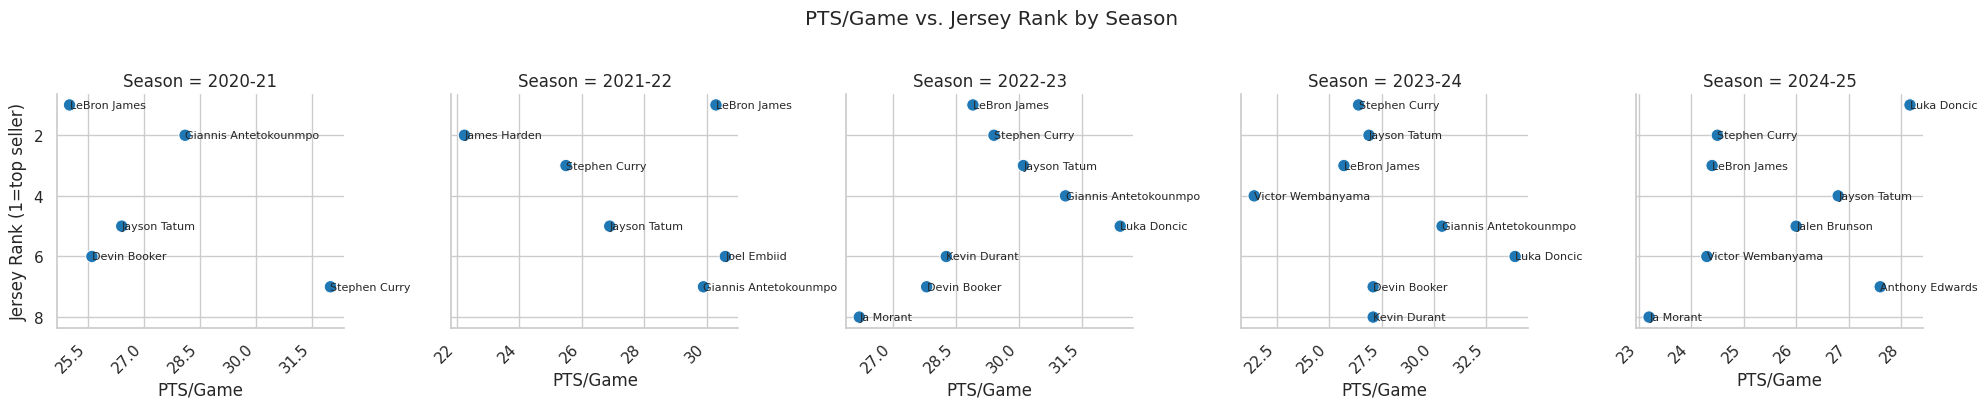

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean up your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting: "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to get exactly one row per (Season,Player) with PTS/Game & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Points/Game']],
        on=['Season','Player'],
        how='left'
    )
    # drop any rows missing Points/Game
    .dropna(subset=['Points/Game'])
)
# make sure types are numeric
df['Rank']       = df['Rank'].astype(int)
df['Points/Game']= df['Points/Game'].astype(float)

# --- 3) Build a 5‑panel FacetGrid, one column per season ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,        # force all 5 on one row
    height=4,
    sharex=False,      # allow different x‑ranges
    sharey=True        # keep rank scale the same
)

# scatter, coloring by season just so panels differ slightly
g.map_dataframe(
    sns.scatterplot,
    x='Points/Game',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate each point and tweak axes
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    # invert y so rank=1 at the top
    ax.invert_yaxis()
    # annotate names
    for _, row in subdf.iterrows():
        ax.text(
            row['Points/Game'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            verticalalignment='center',
            horizontalalignment='left'
        )
    # densify x‑ticks: up to 6 ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# finish up
g.set_axis_labels('PTS/Game', 'Jersey Rank (1=top seller)')
g.fig.suptitle('PTS/Game vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


game_played_graph.py

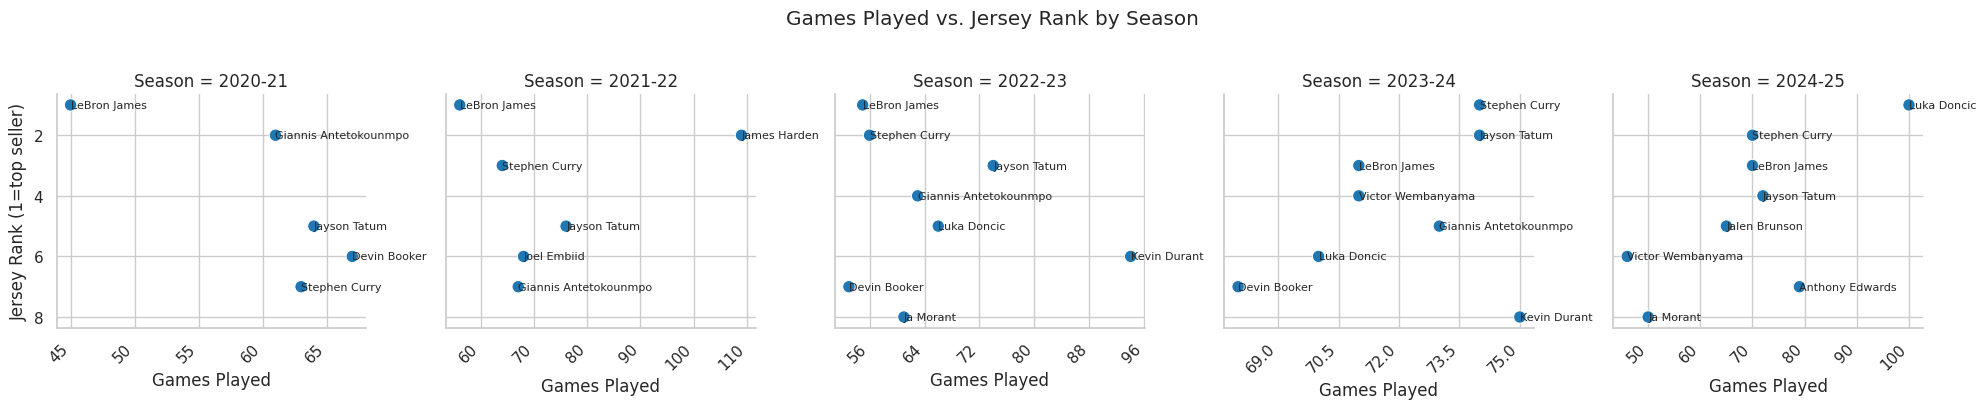

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean up your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting: "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to get one row per (Season,Player) with Games Played & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Games Played']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Games Played'])
)

df['Rank']         = df['Rank'].astype(int)
df['Games Played'] = df['Games Played'].astype(float)

# --- 3) Build a FacetGrid of 5 side‑by‑side panels ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

# scatterplot colored by season
g.map_dataframe(
    sns.scatterplot,
    x='Games Played',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & format each panel
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()  # rank=1 at top
    # annotate names
    for _, row in subdf.iterrows():
        ax.text(
            row['Games Played'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            va='center',
            ha='left'
        )
    # densify x‑axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# labels & title
g.set_axis_labels('Games Played', 'Jersey Rank (1=top seller)')
g.fig.suptitle('Games Played vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


minutepergame_played_graph.py

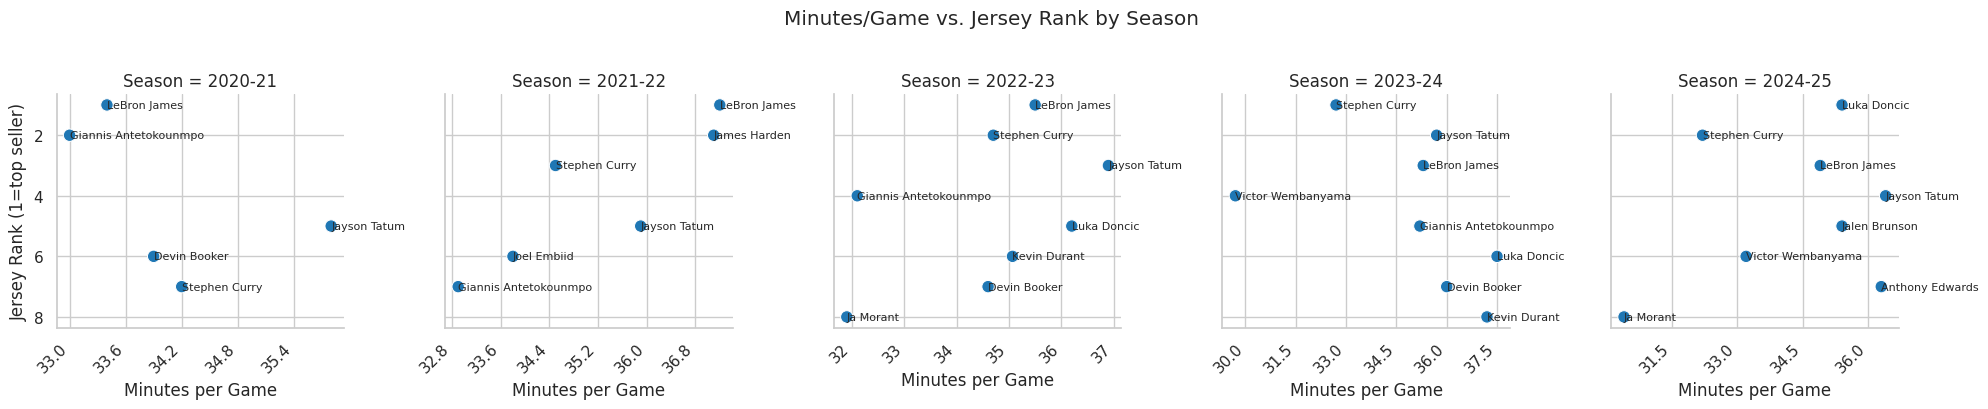

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

# strip whitespace
for df in (jersey, stats):
    df.columns = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify season formatting
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return f"{parts[0]}-{parts[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# --- 2) Merge to one row per (Season,Player) with Minutes/Game & Rank ---
df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Minutes/Game']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Minutes/Game'])
)

df['Rank']         = df['Rank'].astype(int)
df['Minutes/Game'] = df['Minutes/Game'].astype(float)

# --- 3) Build a FacetGrid (5 panels) ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

# scatterplot colored by season
g.map_dataframe(
    sns.scatterplot,
    x='Minutes/Game',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & format each subplot
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()  # so Rank=1 is at top
    # annotate player names
    for _, row in subdf.iterrows():
        ax.text(
            row['Minutes/Game'],
            row['Rank'],
            row['Player'],
            fontsize=8,
            va='center',
            ha='left'
        )
    # make x‐ticks denser and rotate labels
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

# axis labels & overall title
g.set_axis_labels('Minutes per Game', 'Jersey Rank (1=top seller)')
g.fig.suptitle('Minutes/Game vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


award_graph.py

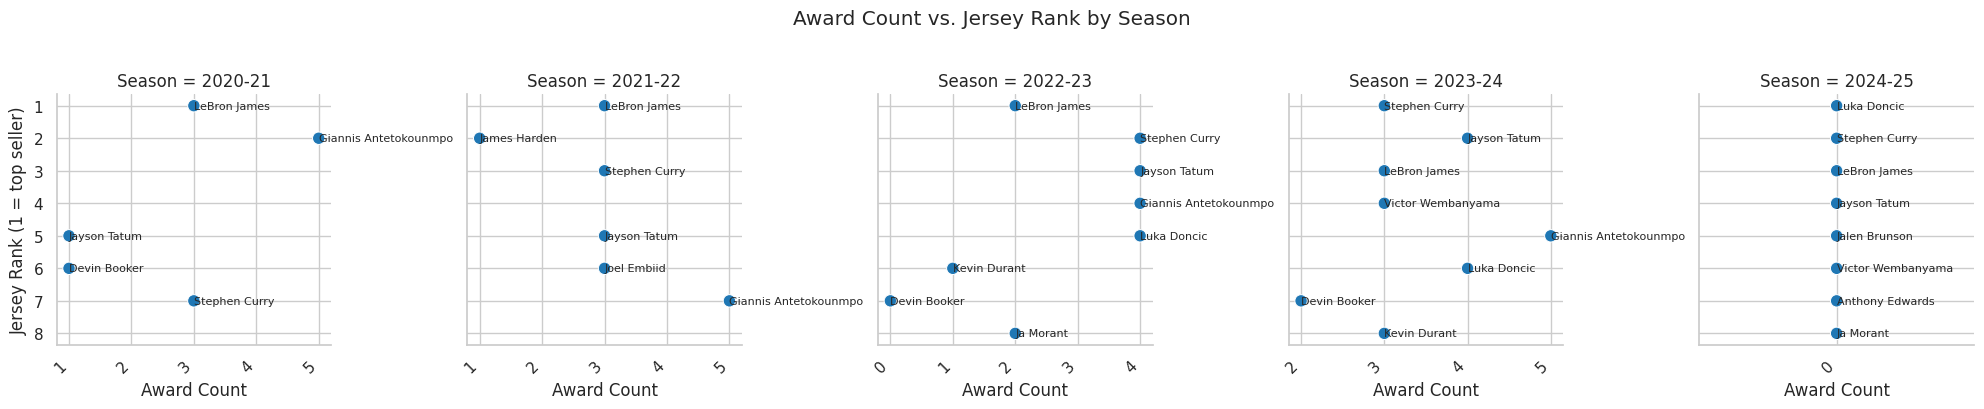

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Load & clean your CSVs ---
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

for df in (jersey, stats):
    df.columns    = df.columns.str.strip()
    df['Season']  = df['Season'].astype(str).str.strip()
    df['Player']  = df['Player'].astype(str).str.strip()

def unify_season(s):
    s = s.replace('–','-')
    a = s.split('-')
    if len(a)==2 and len(a[0])==4 and len(a[1])==4:
        return f"{a[0]}-{a[1][2:]}"
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
stats ['Season'] = stats ['Season'].apply(unify_season)

# ensure the award‐column is named “Award Count”
if 'Awards' in stats.columns:
    stats = stats.rename(columns={'Awards':'Award Count'})

df = (
    pd.merge(
        jersey[['Season','Player','Rank']],
        stats [['Season','Player','Award Count']],
        on=['Season','Player'],
        how='left'
    )
    .dropna(subset=['Award Count'])
)

df['Rank']        = df['Rank'].astype(int)
df['Award Count'] = df['Award Count'].astype(int)   # make sure it's int

# --- 2) Build a FacetGrid (5 panels) ---
sns.set(style='whitegrid')
g = sns.FacetGrid(
    df,
    col='Season',
    col_order=['2020-21','2021-22','2022-23','2023-24','2024-25'],
    col_wrap=5,
    height=4,
    sharex=False,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x='Award Count',
    y='Rank',
    hue='Season',
    palette='tab10',
    s=80,
    legend=False
)

# annotate & force integer x‐ticks
for ax, (season, subdf) in zip(g.axes.flat, df.groupby('Season')):
    ax.invert_yaxis()
    # integer ticks only
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    for _, row in subdf.iterrows():
        ax.text(row['Award Count'], row['Rank'], row['Player'],
                fontsize=8, va='center', ha='left')

    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
        lbl.set_horizontalalignment('right')

g.set_axis_labels('Award Count', 'Jersey Rank (1 = top seller)')
g.fig.suptitle('Award Count vs. Jersey Rank by Season', y=1.02)
plt.tight_layout()
plt.show()


stat_correlation.py

In [9]:
# stat_correlation_with_awards.py
import pandas as pd
from scipy.stats import spearmanr

# 1) Load both CSVs
jersey = pd.read_csv('jersey_ranks.csv')                            # Season, Player, Rank
perf   = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')      # Season, Player, Points/Game, Games Played, Minutes/Game, Award Count

# 2) Strip any extra whitespace
for df in (jersey, perf):
    df.columns   = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# 3) Normalize season strings like "2024-2025" → "2024-25"
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return parts[0] + '-' + parts[1][2:]
    return s

jersey['Season'] = jersey['Season'].apply(unify_season)
perf  ['Season'] = perf  ['Season'].apply(unify_season)

# 4) Merge: left‑join to preserve all jersey ranks
df = pd.merge(
    jersey[['Season','Player','Rank']],
    perf[['Season','Player','Points/Game','Games Played','Minutes/Game','Award Count']],
    on=['Season','Player'],
    how='left'
)

print(f"Merged records: {len(df)}  (should be 40 total)\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# 5) Spearman correlations
metrics = {
    'Points/Game':   'PTS/Game',
    'Games Played':  'GP',
    'Minutes/Game':  'MPG',
    'Award Count':   'AWD'
}

print("\nSpearman correlations (ρ) of Rank vs. each metric:")
for col, short in metrics.items():
    sub = df.dropna(subset=[col, 'Rank'])
    rho, pval = spearmanr(sub['Rank'], sub[col])
    print(f"{short:>10} ↔ Rank : ρ = {rho:.3f},  p = {pval:.3f}")


Merged records: 40  (should be 40 total)

 Season                Player  Rank  Points/Game  Games Played  Minutes/Game  Award Count
2020-21          LeBron James     1    25.000000          45.0     33.400000          3.0
2020-21 Giannis Antetokounmpo     2    28.100000          61.0     33.000000          5.0
2020-21          Kevin Durant     3          NaN           NaN           NaN          NaN
2020-21           Luka Doncic     4          NaN           NaN           NaN          NaN
2020-21          Jayson Tatum     5    26.400000          64.0     35.800000          1.0
2020-21          Devin Booker     6    25.600000          67.0     33.900000          1.0
2020-21         Stephen Curry     7    32.000000          63.0     34.200000          3.0
2020-21          Kyrie Irving     8          NaN           NaN           NaN          NaN
2021-22          LeBron James     1    30.300000          56.0     37.200000          3.0
2021-22          James Harden     2    22.250000         1

pearson_graph_hyp1.py

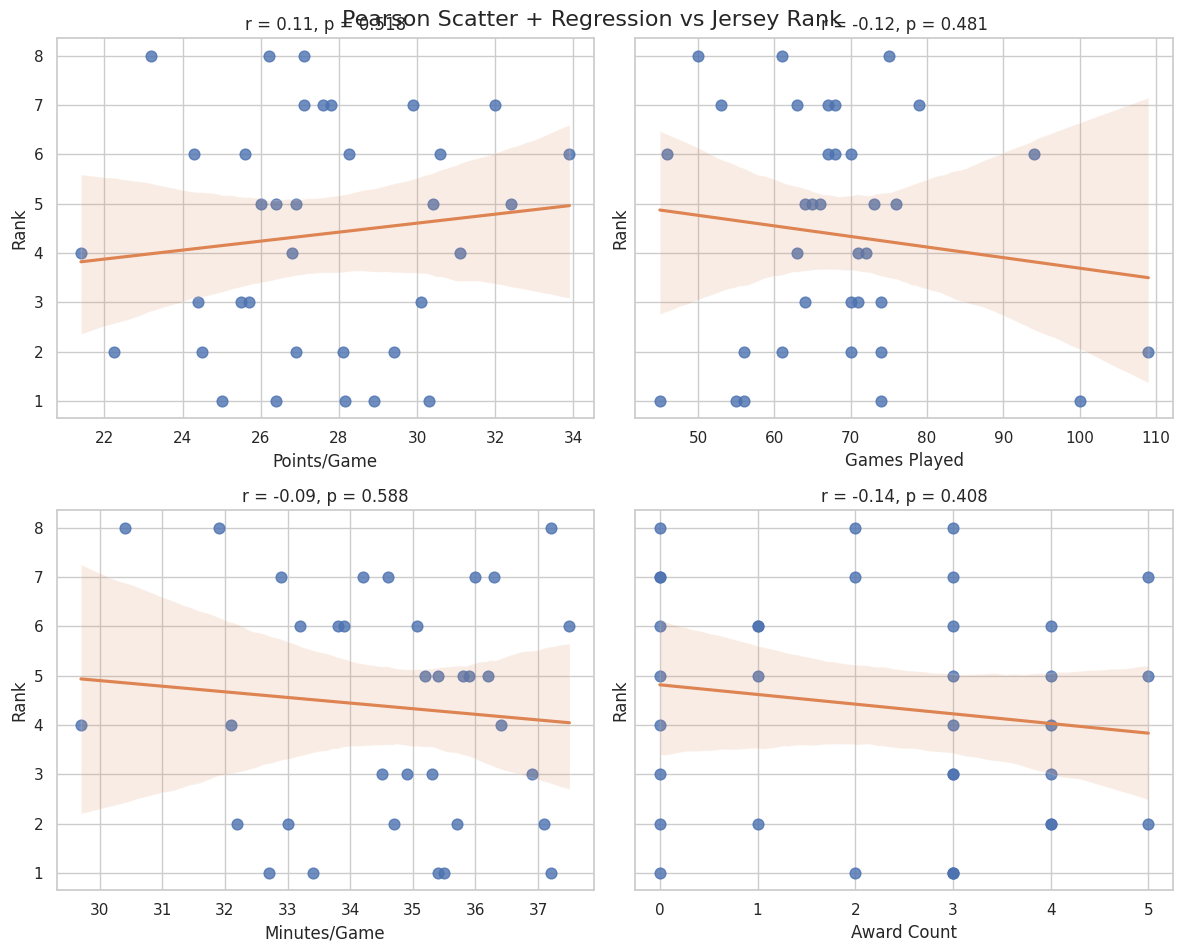

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1) Load & clean
jersey = pd.read_csv('jersey_ranks.csv')
stats  = pd.read_csv('nba_top8_last5_cleaned_with_awards.csv')

for df in (jersey, stats):
    df.columns   = df.columns.str.strip()
    df['Season'] = df['Season'].astype(str).str.strip()
    df['Player'] = df['Player'].astype(str).str.strip()

# unify seasons
def unify(s):
    s = s.replace('–','-')
    a = s.split('-')
    return f"{a[0]}-{a[1][2:]}" if len(a)==2 and len(a[0])==4 and len(a[1])==4 else s

jersey['Season'] = jersey['Season'].apply(unify)
stats ['Season'] = stats ['Season'].apply(unify)

# ensure Award Count column
if 'Awards' in stats.columns:
    stats = stats.rename(columns={'Awards':'Award Count'})
stats['Award Count'] = pd.to_numeric(stats['Award Count'], errors='coerce').fillna(0)

# merge
df = pd.merge(
    jersey[['Season','Player','Rank']],
    stats [['Season','Player','Points/Game','Games Played','Minutes/Game','Award Count']],
    on=['Season','Player'],
    how='inner'
).dropna(subset=['Rank'])

df['Rank'] = df['Rank'].astype(int)

# 2) Plotting function
def pearson_scatter(x, y, ax):
    # scatter + regression
    sns.regplot(x=x, y=y, data=df, ax=ax, scatter_kws={'s':60}, line_kws={'color':'C1'})
    # compute Pearson
    r, p = pearsonr(df[x].dropna(), df[y].dropna())
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"r = {r:.2f}, p = {p:.3f}")
    # invert rank axis so 1 is top
    if y=='Rank':
        ax.invert_yaxis()

# 3) Make figure with 4 subplots: each metric vs Rank
metrics = ['Points/Game','Games Played','Minutes/Game','Award Count']
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharey=True)
axes = axes.flatten()

for ax, m in zip(axes, metrics):
    pearson_scatter(m, 'Rank', ax)

fig.suptitle("Pearson Scatter + Regression vs Jersey Rank", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()


google_graph.py

Merged records: 35

 Season                Player  Rank  TrendIndex
2020-21          LeBron James     1   19.288462
2020-21 Giannis Antetokounmpo     2    8.557692
2020-21          Kevin Durant     3   15.538462
2020-21           Luka Doncic     4    2.500000
2020-21          Jayson Tatum     5    6.807692
2020-21          Devin Booker     6   15.250000
2020-21          Kyrie Irving     8    8.461538
2021-22          LeBron James     1   17.750000
2021-22          James Harden     2    8.134615
2021-22          Kevin Durant     4   18.019231
2021-22          Jayson Tatum     5   13.230769
2021-22           Joel Embiid     6   11.826923
2021-22 Giannis Antetokounmpo     7    6.634615
2021-22           Luka Doncic     8    3.019231
2022-23          LeBron James     1   21.538462
2022-23          Jayson Tatum     3   16.173077
2022-23 Giannis Antetokounmpo     4    7.038462
2022-23           Luka Doncic     5    3.211538
2022-23          Kevin Durant     6   15.211538
2022-23          Dev

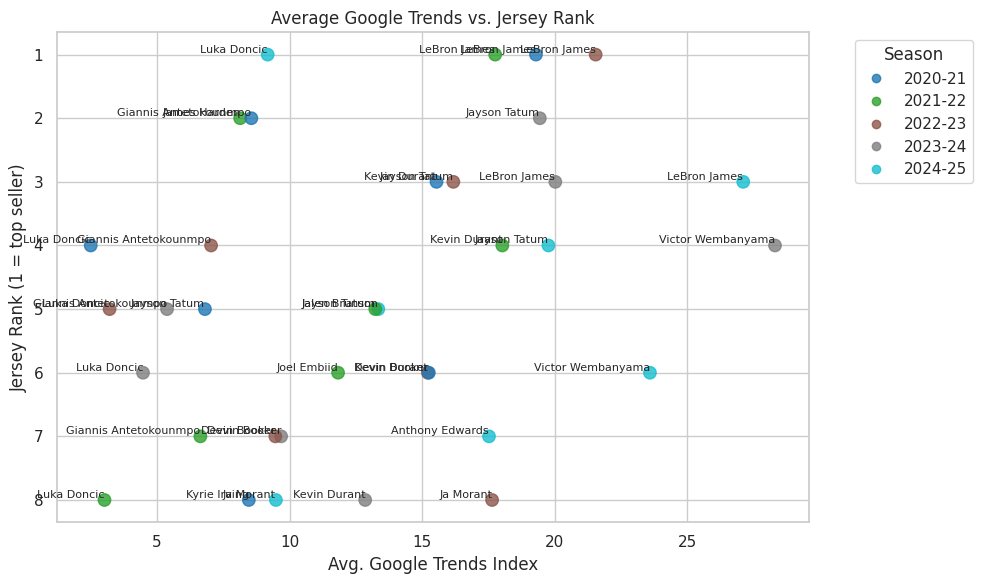

In [20]:
# google_trend_viz.py

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the CSVs
jersey     = pd.read_csv('jersey_ranks.csv')             # columns: Season, Player, Rank
trend_wide = pd.read_csv('combined_google_trends.csv')   # columns: date, <Player1>, <Player2>, …

# 2) Clean up column names
for df in (jersey, trend_wide):
    df.columns = df.columns.str.strip()

# 3) Melt the Trends DF to long form
trend = trend_wide.melt(
    id_vars=['date'],
    var_name='Player',
    value_name='TrendIndex'
)

# 4) Parse dates and bucket into seasons
trend['date'] = pd.to_datetime(trend['date'], errors='coerce')

def date_to_season(dt):
    # NBA season runs roughly Oct → Jun
    if dt.month >= 10:
        start, end = dt.year, dt.year + 1
    else:
        start, end = dt.year - 1, dt.year
    return f"{start}-{str(end)[2:]}"

trend['Season'] = trend['date'].apply(date_to_season)

# 5) Compute average TrendIndex per Season & Player
trend_avg = (
    trend
    .groupby(['Season','Player'], as_index=False)['TrendIndex']
    .mean()
)

# 6) (Optional) normalize jersey season formatting
def unify_season(s):
    s = s.replace('–','-')
    parts = s.split('-')
    if len(parts)==2 and len(parts[0])==4 and len(parts[1])==4:
        return parts[0] + '-' + parts[1][2:]
    return s

jersey['Season'] = jersey['Season'].astype(str).apply(unify_season)
jersey['Player'] = jersey['Player'].astype(str).str.strip()

# 7) Merge on Season & Player (inner join to keep only matched rows)
df = pd.merge(
    jersey[['Season','Player','Rank']],
    trend_avg,
    on=['Season','Player'],
    how='inner'
)

# --- Output the merged TrendIndex table ---
print(f"Merged records: {len(df)}\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# --- Scatter plot: Avg. TrendIndex vs. Jersey Rank ---
plt.figure(figsize=(10, 6))
x = df['TrendIndex']
y = df['Rank']

# invert y-axis so Rank=1 sits at the top
plt.gca().invert_yaxis()

# color‐code by season
categories = df['Season'].astype('category')
colors = categories.cat.codes
scatter = plt.scatter(x, y, c=colors, cmap='tab10', s=80, alpha=0.8)

# annotate each point with the player name
for _, row in df.iterrows():
    plt.text(row['TrendIndex'], row['Rank'],
             row['Player'],
             fontsize=8, ha='right', va='bottom')

plt.title("Average Google Trends vs. Jersey Rank")
plt.xlabel("Avg. Google Trends Index")
plt.ylabel("Jersey Rank (1 = top seller)")

# build a legend mapping seasons → colors
handles, _ = scatter.legend_elements(prop="colors")
labels = list(categories.cat.categories)
plt.legend(handles, labels, title="Season", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


google_graph_correlation.py

Merged records: 40 (should be 40)

 Season  Rank                Player  AvgTrendIndex
2020-21     1          LeBron James      19.288462
2020-21     2 Giannis Antetokounmpo       8.557692
2020-21     3          Kevin Durant      15.538462
2020-21     4           Luka Doncic       2.500000
2020-21     5          Jayson Tatum       6.807692
2020-21     6          Devin Booker      15.250000
2020-21     7         Stephen Curry      14.000000
2020-21     8          Kyrie Irving       8.461538
2021-22     1          LeBron James      17.750000
2021-22     2          James Harden       8.134615
2021-22     3         Stephen Curry      22.826923
2021-22     4          Kevin Durant      18.019231
2021-22     5          Jayson Tatum      13.230769
2021-22     6           Joel Embiid      11.826923
2021-22     7 Giannis Antetokounmpo       6.634615
2021-22     8           Luka Doncic       3.019231
2022-23     1          LeBron James      21.538462
2022-23     2         Stephen Curry      18.096

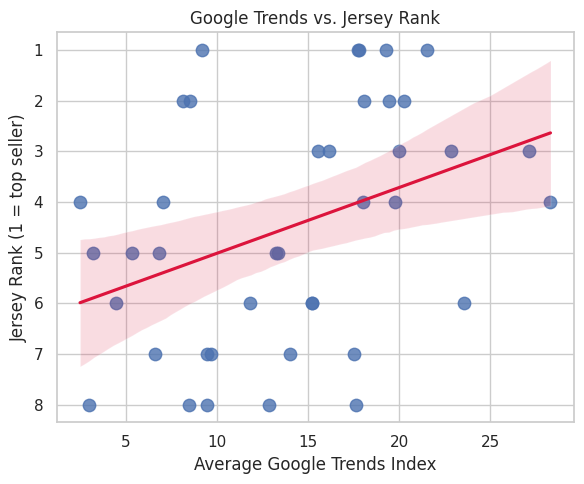

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load
jersey = pd.read_csv('jersey_ranks.csv')              # Season, Rank, Player
trend  = pd.read_csv('combined_google_trends.csv')    # date + one column per player

# 2) Clean up column names & player typos
trend.rename(columns={'Stephan Curry': 'Stephen Curry'}, inplace=True)
trend.columns = trend.columns.str.strip()
jersey['Player'] = jersey['Player'].str.strip()
jersey['Season'] = jersey['Season'].str.strip()

# 3) Compute season label for each weekly row
trend['date'] = pd.to_datetime(trend['date'])
def to_season(dt):
    year, m = dt.year, dt.month
    if m >= 10:
        start, end = year, year + 1
    else:
        start, end = year - 1, year
    return f"{start}-{str(end)[2:]}"
trend['Season'] = trend['date'].apply(to_season)

# 4) Melt to long form and average per season/player
value_cols = [c for c in trend.columns if c not in ['date','Season']]
_long = trend.melt(id_vars=['Season'], value_vars=value_cols,
                   var_name='Player', value_name='TrendIndex')
_avg_tr = (_long
    .groupby(['Season','Player'], as_index=False)['TrendIndex']
    .mean()
    .rename(columns={'TrendIndex':'AvgTrendIndex'})
)

# 5) Make jersey seasons match the same “YYYY-YY” format
def unify_jseason(s):
    # e.g. “2024-2025” → “2024-25”
    p = s.split('-')
    if len(p)==2 and len(p[1])==4:
        return p[0] + '-' + p[1][2:]
    return s

jersey['Season'] = jersey['Season'].apply(unify_jseason)

# 6) Merge and drop any missing trend rows
df = (jersey
      .merge(_avg_tr, on=['Season','Player'], how='inner')
      .dropna(subset=['AvgTrendIndex','Rank'])
)
print(f"Merged records: {len(df)} (should be 40)\n")
print(df.sort_values(['Season','Rank']).to_string(index=False))

# 7) Compute correlations
rho_s, p_s = spearmanr(df['Rank'], df['AvgTrendIndex'])
rho_p, p_p = pearsonr(df['Rank'], df['AvgTrendIndex'])
print("\n--- Correlation results ---")
print(f"Spearman ρ = {rho_s:.3f},  p = {p_s:.3f}")
print(f"Pearson  ρ = {rho_p:.3f},  p = {p_p:.3f}")

# 8) Plot
plt.figure(figsize=(6,5))
sns.regplot(
    data=df,
    x='AvgTrendIndex', y='Rank',
    scatter_kws={'s': 80, 'alpha':0.8},
    line_kws={'color':'crimson'}
)
plt.gca().invert_yaxis()  # so rank=1 sits at the top
plt.title('Google Trends vs. Jersey Rank')
plt.xlabel('Average Google Trends Index')
plt.ylabel('Jersey Rank (1 = top seller)')
plt.tight_layout()
plt.show()
